In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
import sqlite3 
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [ ]:
conn= sqlite3.connect('inventory.db')
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.0000,7153.000,9552.0000,201359.00
Brand,10692.0,18039.228769,12662.187074,58.00,5793.5000,18761.500,25514.2500,90631.00
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.8400,10.455,19.4825,5681.81
ActualPrice,10692.0,35.643671,148.246016,0.49,10.9900,15.990,28.9900,7499.99
Volume,10692.0,847.360550,664.309212,50.00,750.0000,750.000,750.0000,20000.00
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.0000,262.000,1975.7500,337660.00
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.4575,3655.465,20738.2450,3811251.60
TotalSalesQuantity,10692.0,1.657220,8.326181,0.00,0.0000,0.000,0.0000,281.00
TotalSalesDollars,10692.0,23.210663,113.892138,0.00,0.0000,0.000,0.0000,3599.00
TotalSalesPrice,10692.0,12.290292,45.814891,0.00,0.0000,0.000,0.0000,779.80


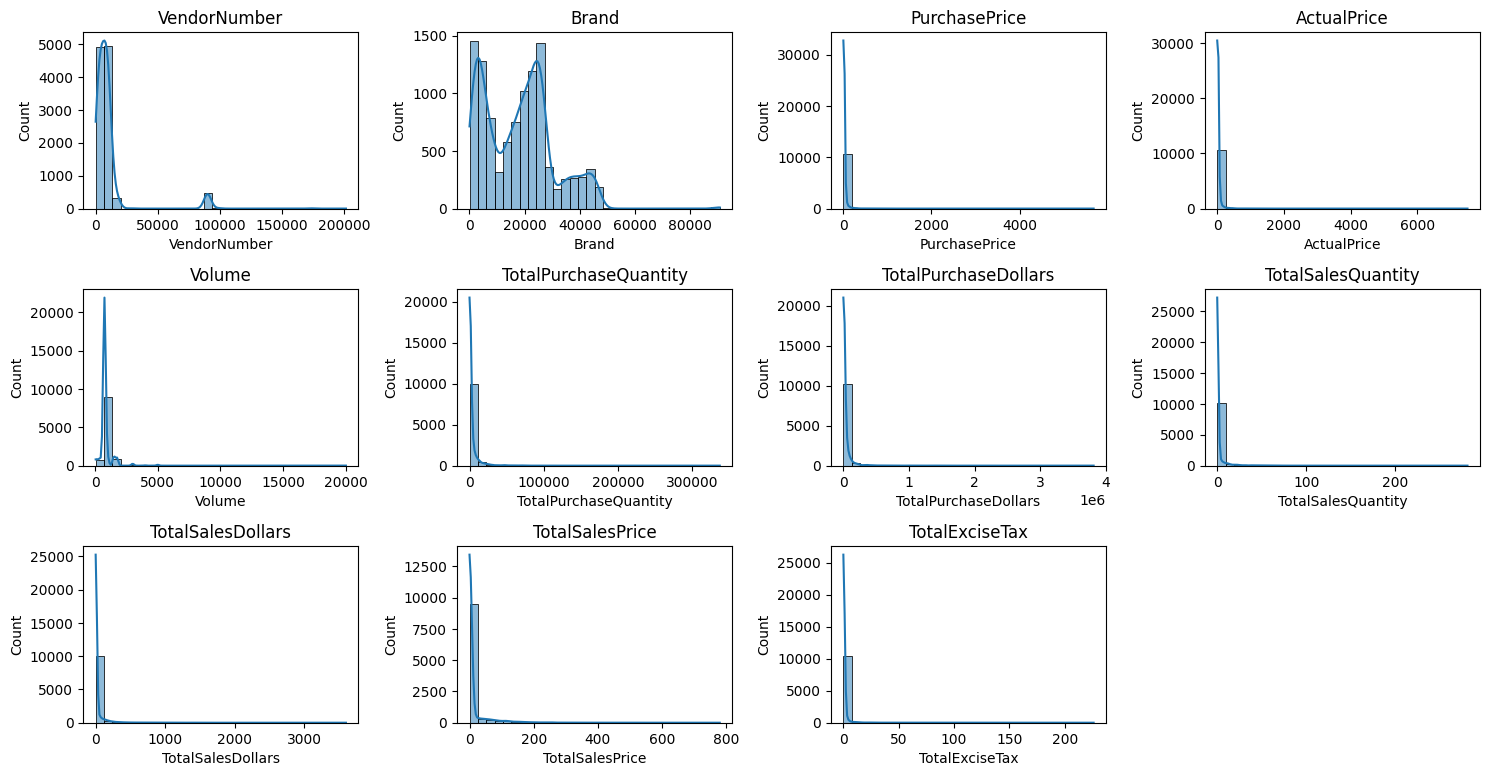

In [14]:
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

In [18]:
df=pd.read_sql_query("""SELECT * FROM vendor_sales_summary WHERE TotalSalesDollars>0 AND TotalSalesQuantity >0 """,conn)

In [19]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,100.0,3599.00,647.82,183.74
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,76.0,2279.24,569.81,139.62
2,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,89.0,2679.11,543.82,163.52
3,17035,PERNOD RICARD USA,2589,Jameson Irish Whiskey,30.76,39.99,1750.0,70783,2177285.08,47.0,1967.53,709.83,86.35
4,3960,DIAGEO NORTH AMERICA INC,3102,Smirnoff Traveler,12.94,17.99,1750.0,161386,2088334.84,55.0,989.45,287.84,101.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,8664,"STOLI GROUP,(USA) LLC",3147,Stolichnaya Chocolat Kokonut,0.71,0.99,50.0,64,45.44,9.0,8.91,3.96,0.47
1443,480,BACARDI USA INC,1020,B & B Dom VAP,18.11,28.99,750.0,2,36.22,1.0,24.99,24.99,0.79
1444,3252,E & J GALLO WINERY,14620,Bodega Elena de Mendoza Mlbc,4.76,6.99,750.0,7,33.32,23.0,160.77,48.93,2.57
1445,1392,CONSTELLATION BRANDS INC,18000,Vendange Sweet White,2.75,6.99,1500.0,12,33.00,1.0,3.99,3.99,0.22


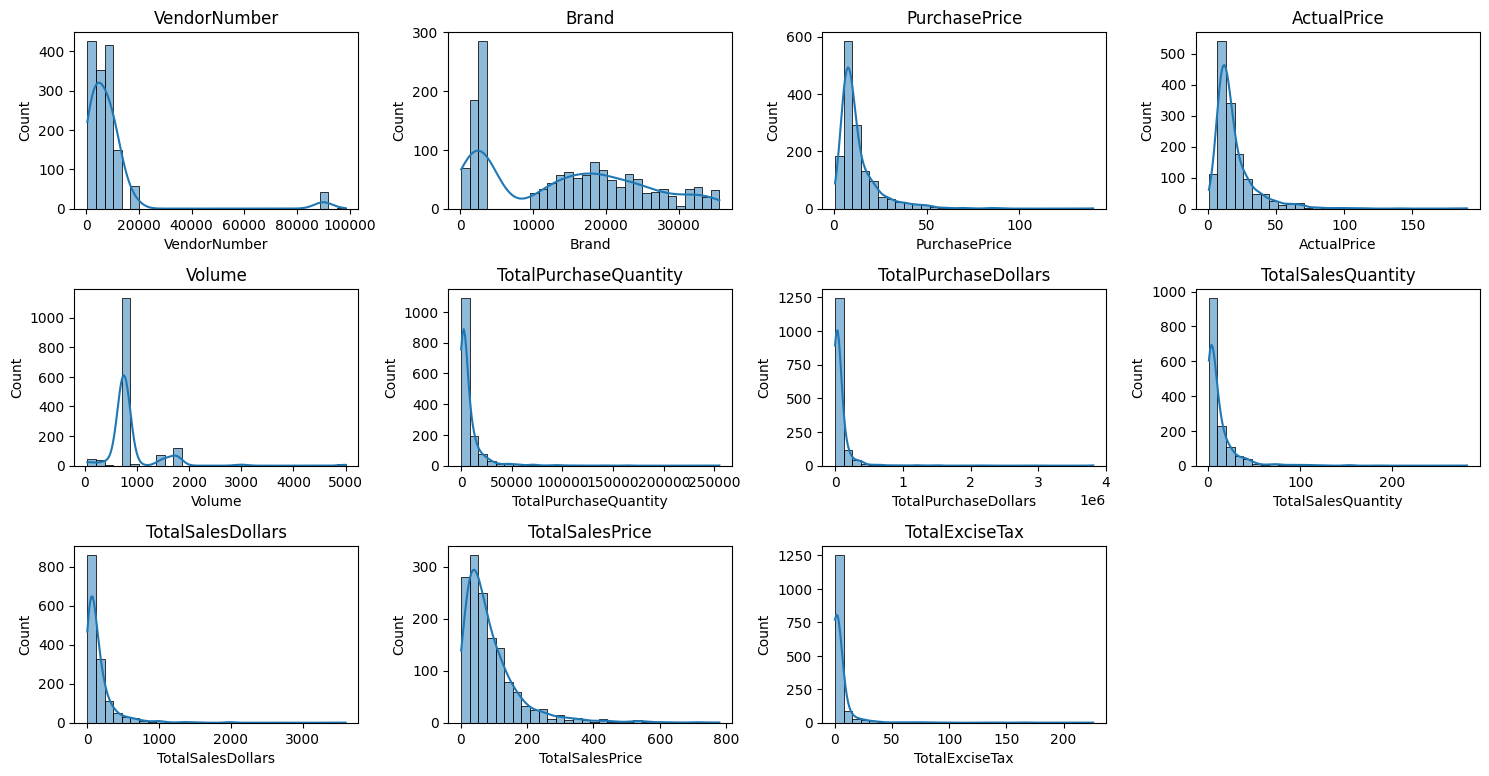

In [20]:
numerical_cols = df.select_dtypes(include = np.number).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

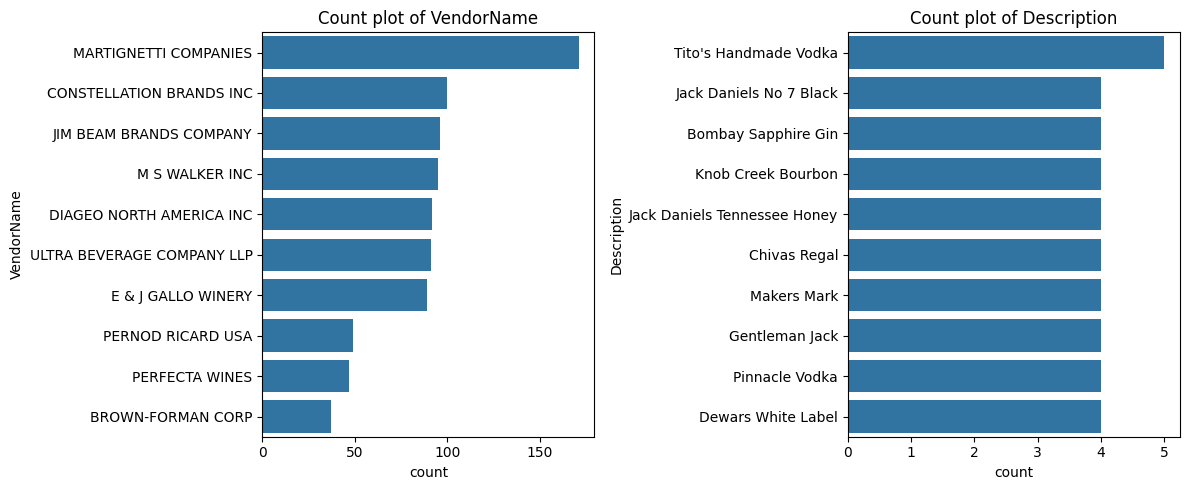

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()


Number of numerical columns: 11


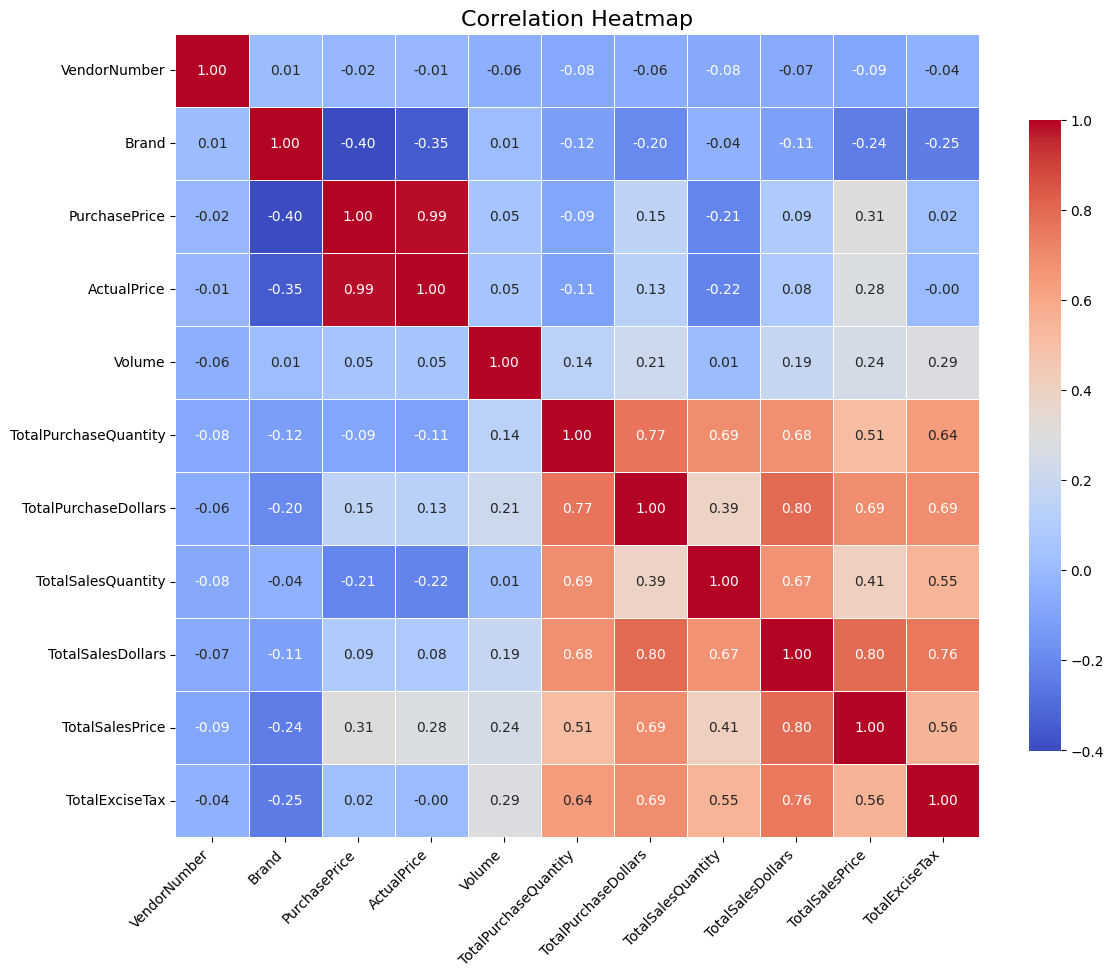

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Check for too many columns
print("Number of numerical columns:", len(numerical_cols))

plt.figure(figsize=(12, 10))  # Increase figure size
correlation_matrix = df[numerical_cols].fillna(0).corr()

sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            square=True,          # Makes each cell square
            cbar_kws={"shrink": .75})  # Adjust color bar size

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.yticks(rotation=0)
plt.tight_layout()                   # Fix overlapping labels
plt.show()


In [39]:
"""which  vendors"""

'which  vendors'

In [40]:
top_vendors=df.groupby("VendorName") ["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("Description") ["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
MARTIGNETTI COMPANIES         31607.97
JIM BEAM BRANDS COMPANY       24010.55
DIAGEO NORTH AMERICA INC      23433.83
CONSTELLATION BRANDS INC      16063.82
E & J GALLO WINERY            15140.50
ULTRA BEVERAGE COMPANY LLP    14174.00
BROWN-FORMAN CORP             14120.72
M S WALKER INC                13224.37
PERNOD RICARD USA             11505.31
WINE GROUP INC                 6421.16
Name: TotalSalesDollars, dtype: float64

In [42]:
top_brands

Description
Jack Daniels No 7 Black     5836.35
Jameson Irish Whiskey       4829.98
Tito's Handmade Vodka       4285.55
Jim Beam                    3350.10
Ketel One Vodka             3218.37
Pinnacle Vodka              2602.08
Johnnie Walker Red Label    2115.27
Canadian Club               1966.77
Knob Creek Bourbon          1912.69
Dewars White Label          1882.95
Name: TotalSalesDollars, dtype: float64

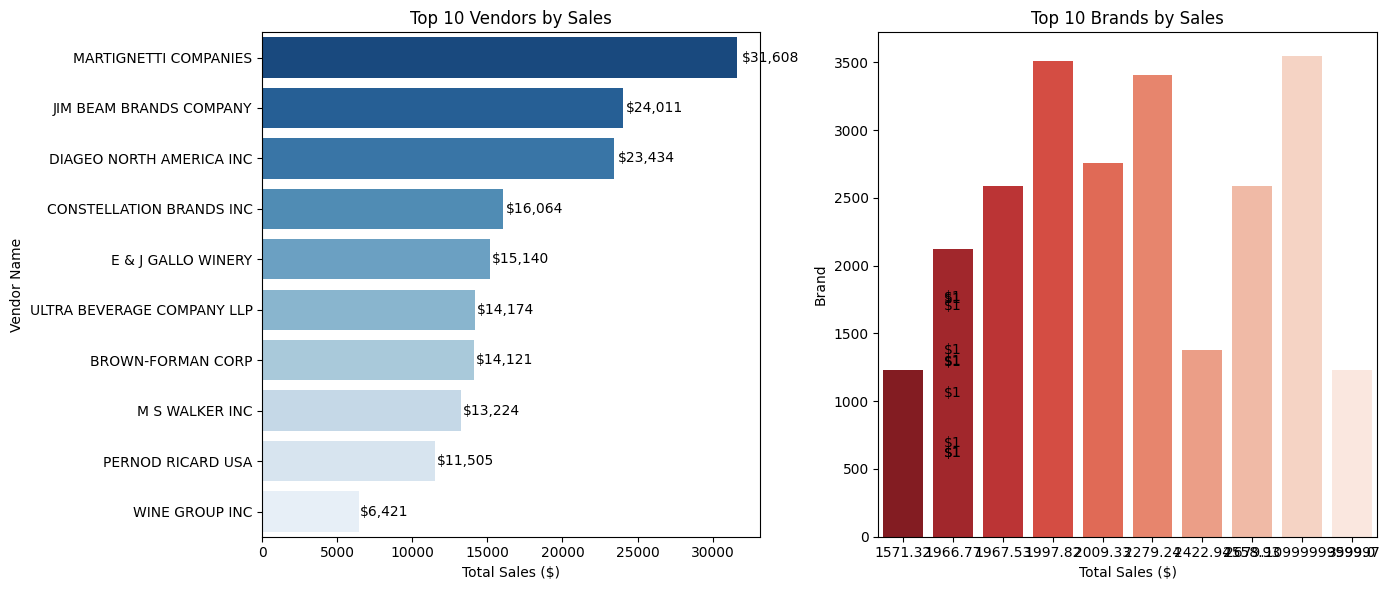

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample function to format dollar values
def format_dollars(x):
    return f"${x:,.0f}"

# Sample top_vendors aur top_brands (replace with your actual DataFrame logic)
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Brand')['TotalSalesDollars'].sum().nlargest(10)

plt.figure(figsize=(14, 6))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Vendor Name")
for bar in ax1.patches:
    ax1.text(bar.get_width() * 1.01,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index, x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Brand")
for bar in ax2.patches:
    ax2.text(bar.get_width() * 1.01,
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [48]:
df.groupby('VendorName').agg({
           'TotalPurchaseDollars':'sum',
           'TotalSalesDollars':'sum'
})

,TotalPurchaseDollars,TotalSalesDollars
VendorName,,
ATLANTIC IMPORTING COMPANY,37885.64,115.96
BACARDI USA INC,5588259.07,5743.96
BANFI PRODUCTS CORP,700689.87,3696.76
BLACK PRINCE DISTILLERY INC,4288.20,137.91
BROWN-FORMAN CORP,10031846.41,14120.72
...,...,...
VRANKEN AMERICA,154002.87,211.93
WESTERN SPIRITS BEVERAGE CO,193299.74,356.77
WILLIAM GRANT & SONS INC,3042460.37,4112.95


In [19]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [22]:
df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"],q=3, labels=["Small","Medium","Large"])
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,138109
3,Large,70783
4,Large,161386
...,...,...
1442,Small,64
1443,Small,2
1444,Small,7
1445,Small,12


In [26]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,15.578174
Medium,13.479751
Large,10.224203


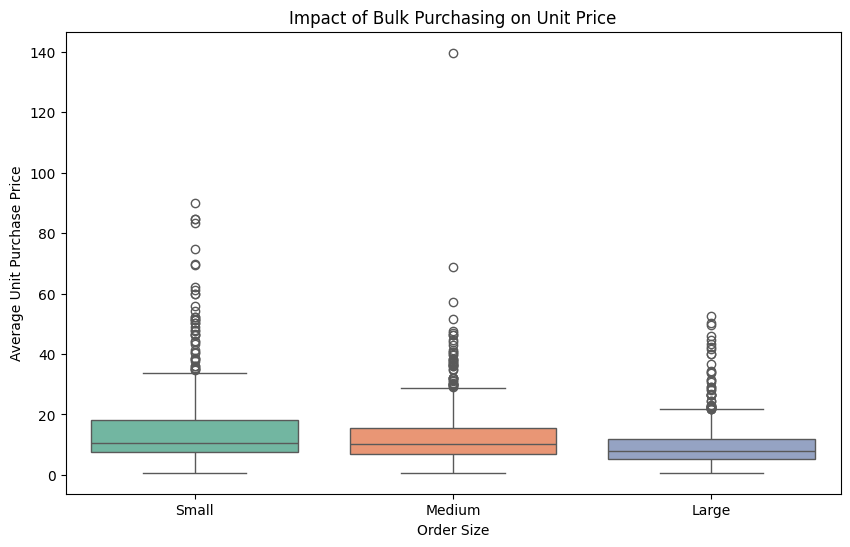

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [37]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
top_threshold = df['TotalSalesDollars'].quantile(0.25)
